In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Ice_cream selling data.csv')
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [3]:
df.isna().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.shape

(49, 2)

<Axes: >

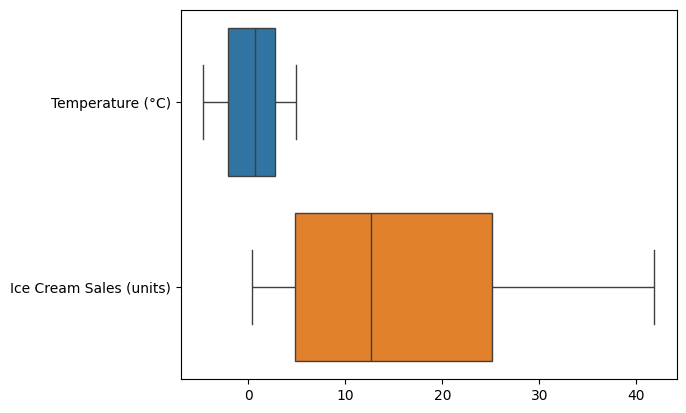

In [6]:
sns.boxplot(df, orient='h')

In [7]:
x = df['Temperature (°C)']
y = df['Ice Cream Sales (units)']

In [8]:
np.random.seed(0)
train_size = int(len(x) * 0.8)
idx = np.random.permutation(len(x))

x_train, x_test = x.iloc[idx[:train_size]], x.iloc[idx[train_size:]]
y_train, y_test = y.iloc[idx[:train_size]], y.iloc[idx[train_size:]]

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39,)
(10,)
(39,)
(10,)


In [9]:
min_value = x_train.min(axis=0)
max_value = x_train.max(axis=0)
range_value = max_value - min_value
x_train = (x_train - min_value) / range_value

In [10]:
x_test = (x_test - min_value) / range_value

In [11]:
from itertools import combinations_with_replacement

In [12]:
class PolynomialFeatures:
    def __init__(self, degree=2):
        self.degree = degree

    def fit_transform(self, X):
        n_samples, n_features = X.shape
        features = [np.ones(n_samples)]
        for d in range(1, self.degree + 1):
            for item in combinations_with_replacement(range(n_features), d):
                features.append(np.prod(X[:, item], axis=1))
        return np.vstack(features).T


In [13]:
class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add bias term
        theta_best = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        self.intercept_ = theta_best[0]
        self.coef_ = theta_best[1:]

    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_

In [14]:
class PolynomialRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.poly_features = PolynomialFeatures(degree=degree)
        self.linear_regression = LinearRegression()

    def fit(self, X, y):
        if X.ndim == 1:
            X = X.values.reshape(-1, 1)
        X_poly = self.poly_features.fit_transform(X)
        self.linear_regression.fit(X_poly, y)

    def predict(self, X):
        if X.ndim == 1:
            X = X.values.reshape(-1, 1)
        X_poly = self.poly_features.fit_transform(X)
        return self.linear_regression.predict(X_poly)

In [15]:
model = PolynomialRegression(degree=4)

In [16]:
model.fit(x_train, y_train)

In [17]:
predictions = model.predict(x_test)

In [18]:
x_test

36    0.770585
21    0.464719
19    0.452160
9     0.180593
39    0.796198
45    0.870331
3     0.039813
0    -0.037513
47    0.916934
44    0.860209
Name: Temperature (°C), dtype: float64

In [19]:
predictions

array([15.28935743,  1.76950867,  2.01856905, 19.97575317, 17.9742107 ,
       26.69919596, 33.7040328 , 40.04892966, 32.72949164, 25.43643228])

In [20]:
def evaluate(y_true, y_pred):
    r2 = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - y_true.mean())**2))
    mse = np.mean((y_true - y_pred)**2)
    mae = np.mean(np.abs(y_true - y_pred))
    return {'R-Squred': r2, 'Mean Squared Error': mse, 'Mean Absolute Error': mae}

for key, value in evaluate(y_test, predictions).items():
    print(f'{key}: {value}')

R-Squred: 0.903411879867383
Mean Squared Error: 14.672298073555222
Mean Absolute Error: 2.9670342394841116


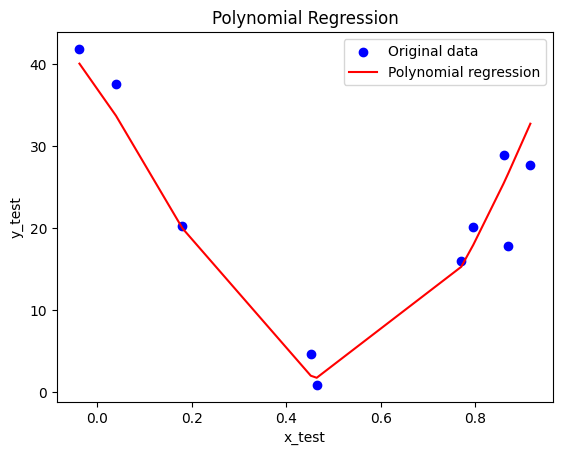

In [21]:
plt.scatter(x_test, y_test, color='blue', label='Original data')
plt.plot(np.sort(x_test, axis=0), predictions[np.argsort(x_test, axis=0)], color='red', label=f'Polynomial regression')
plt.xlabel('x_test')
plt.ylabel('y_test')
plt.legend()
plt.title('Polynomial Regression')
plt.show()

In [22]:
df.shape

(49, 2)

In [23]:
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679
